In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.applications import MobileNetV2

import pydot
import graphviz

In [2]:
RANDOM_SEED = 30012021
TRAIN_SET_PATH = 'data/rps/rps/'
TEST_SET_PATH = 'data/rps-test-set/rps-test-set/'

# Dataset Overview and Preprocessing

In [3]:
train_dataset = image_dataset_from_directory(
    TRAIN_SET_PATH,
    subset='training',
    validation_split=0.2,
    image_size=(300, 300),
    seed=RANDOM_SEED,
)

validation_dataset = image_dataset_from_directory(
    TRAIN_SET_PATH,
    subset='validation',
    validation_split=0.2,
    image_size=(300, 300),
    seed=RANDOM_SEED,
)

test_dataset = image_dataset_from_directory(
    TRAIN_SET_PATH,
    image_size=(300, 300),
    seed=RANDOM_SEED,
)

label_names = train_dataset.class_names

Found 2520 files belonging to 3 classes.
Using 2016 files for training.
Found 2520 files belonging to 3 classes.
Using 504 files for validation.
Found 2520 files belonging to 3 classes.


In [4]:
normalization = Rescaling(1./255)

train_dataset = train_dataset.map(lambda x, y: (normalization(x), y))
validation_dataset = validation_dataset.map(lambda x, y: (normalization(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization(x), y))

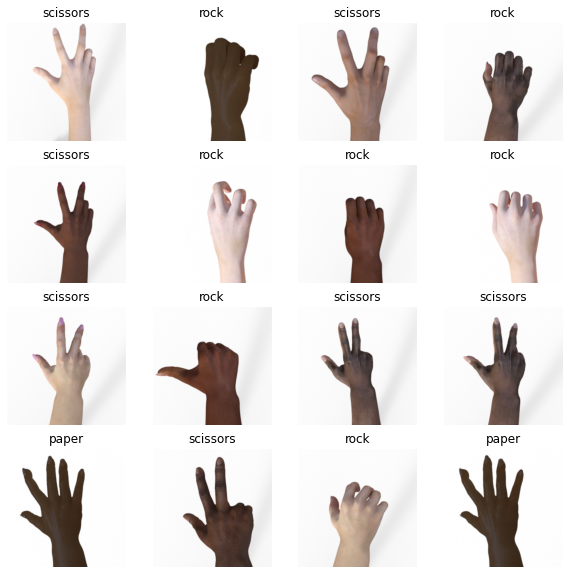

In [5]:
plt.figure(figsize=(10, 10))

for images, labels in train_dataset.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i])
    plt.title(label_names[labels[i]])
    plt.axis('off')

# Classification

In [6]:
base_model = MobileNetV2(
    input_shape=(300, 300, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

base_model.trainable = False

base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 150, 150, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 150, 150, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 150, 150, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

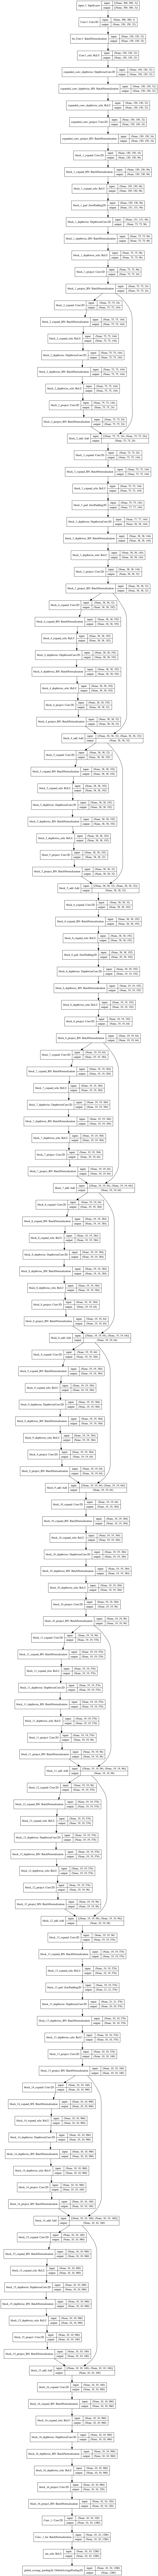

In [7]:
tf.keras.utils.plot_model(
    base_model,
    show_shapes=True,
    show_layer_names=True,
)

# References
- https://colab.research.google.com/github/trekhleb/machine-learning-experiments/blob/master/experiments/rock_paper_scissors_mobilenet_v2/rock_paper_scissors_mobilenet_v2.ipynb